# Лабораторная работа №6 "Линейная регрессия"
## Студент: Кирпа Дмитрий
## Преподаватель: Мангараков Александр

## Подключение зависимостей

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

## Загрузка данных

In [2]:
data = pd.read_csv("Food_Delivery_Times.csv")
data

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [3]:
X, y = data["Distance_km"].to_numpy(), data["Delivery_Time_min"].to_numpy()

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

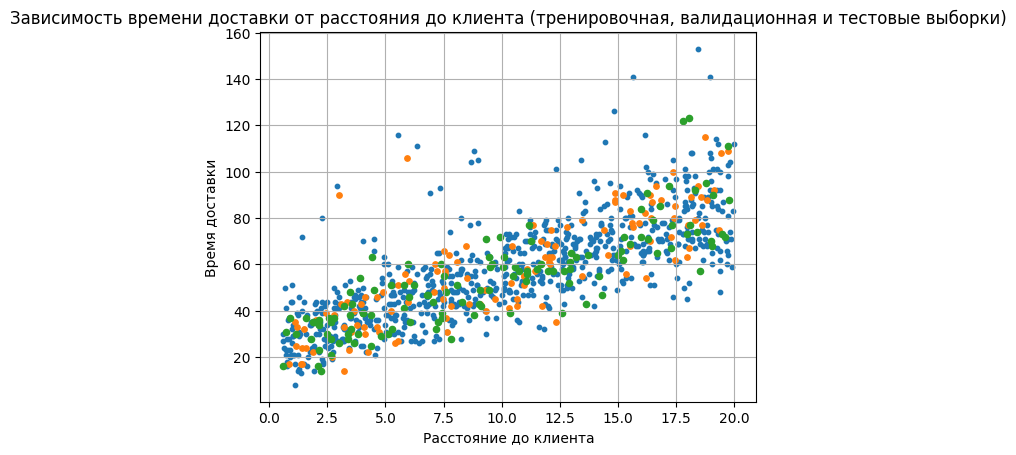

In [42]:
plt.scatter(X_train, y_train, marker='o', s=10)
plt.scatter(X_val, y_val, marker='o', s=15)
plt.scatter(X_test, y_test, marker='o', s=20)

plt.title("Зависимость времени доставки от расстояния до клиента (тренировочная, валидационная и тестовые выборки)")
plt.xlabel("Расстояние до клиента")
plt.ylabel("Время доставки")

plt.grid()

plt.show()

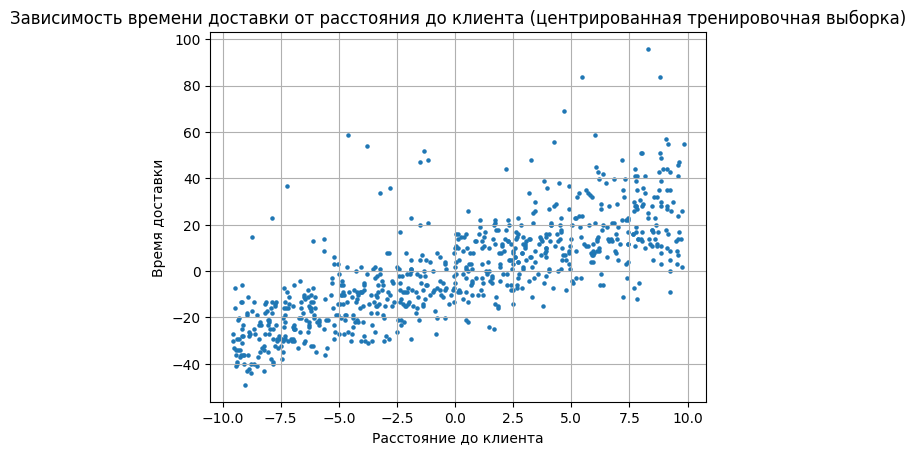

In [41]:
X_train_centered = X_train - np.mean(X_train)
y_train_centered = y_train - np.mean(y_train)

plt.scatter(X_train_centered, y_train_centered, marker='o', s=5)

plt.title("Зависимость времени доставки от расстояния до клиента (центрированная тренировочная выборка)")
plt.xlabel("Расстояние до клиента")
plt.ylabel("Время доставки")

plt.grid()

plt.show()

## Гребневая регрессия через сингулярное разложение

Коэффициент регуляризации:

In [43]:
T = 0

Сингулярное разложение матрицы признаков:

In [44]:
U, S, Vt = np.linalg.svd(X_train_centered.reshape(-1, 1), full_matrices=False)

Вычисление весов через матрицы U, S, V:

β = V (Σ / (Σ^2 + α)) U^T y

In [45]:
betas = Vt.T @ np.divide(S, S * S + T, where=(S != 0)) @ U.T @ y_train
betas

2.9546380590369243

In [46]:
b = np.mean(y_train) - betas * np.mean(X_train)
b

27.17448641973703

Построение

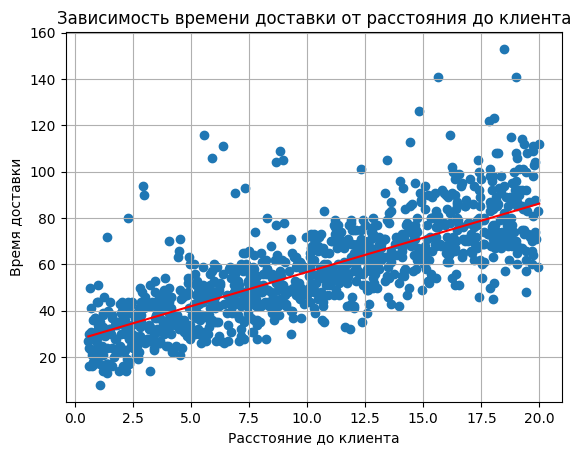

In [38]:
plt.scatter(X, y, marker='o')

x_line = np.linspace(min(X), max(X), 1_000)
y_line = betas * x_line + b

plt.plot(x_line, y_line, color='red', label='Fitted Line')

plt.title("Зависимость времени доставки от расстояния до клиента")
plt.xlabel("Расстояние до клиента")
plt.ylabel("Время доставки")

plt.grid()

plt.show()

Подбор оптимального значения коэффициента регуляризации (`O(kn2 + knT)` операций):

In [31]:
best_t = 0
best_quality = 10**9
qualities = []

for current_t in range(251):
  checked_betas = Vt.T @ np.divide(S, S * S + current_t, where=(S != 0)) @ U.T @ y_train
  if (current_quality := np.linalg.norm(checked_betas * X_val + b - y_val)) < best_quality:
    best_quality = current_quality
    best_t = current_t
  qualities.append(current_quality)

In [34]:
best_t

0

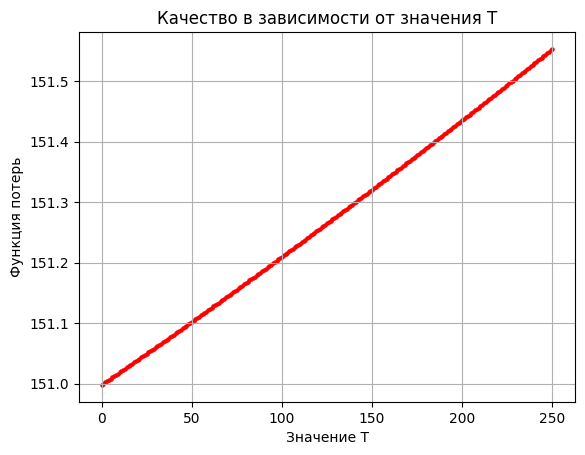

In [37]:
plt.scatter(range(251), qualities, color='red', label='Fitted Line', s=5)

plt.title("Качество в зависимости от значения T")
plt.xlabel("Значение T")
plt.ylabel("Функция потерь")

plt.grid()

plt.show()

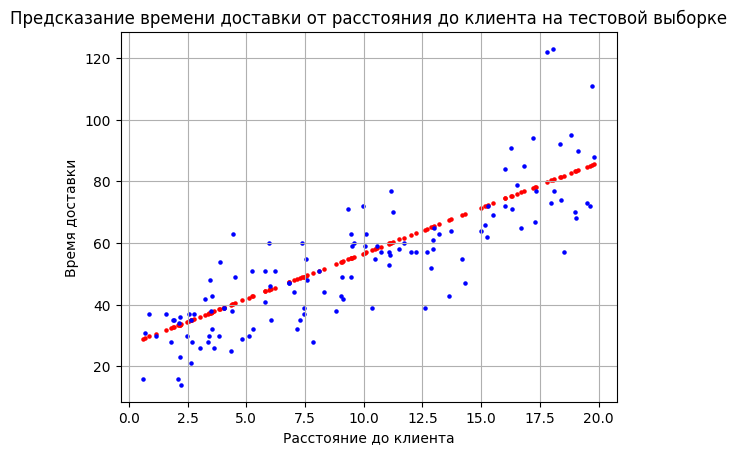

In [49]:
y_pred = betas * X_test + b

plt.scatter(X_test, y_pred, color='red', s=5)
plt.scatter(X_test, y_test, color='blue', s=5)

plt.title("Предсказание времени доставки от расстояния до клиента на тестовой выборке")
plt.xlabel("Расстояние до клиента")
plt.ylabel("Время доставки")

plt.grid()

plt.show()

Качество полученной модели:

In [50]:
quality = np.linalg.norm(y_pred - y_test)
quality

130.26890458403912

## Библиотечная версия

In [53]:
ridge = Ridge(alpha=0.0, solver='svd')

ridge.fit(X_train.reshape(-1, 1), y_train)

Ridge(alpha=0.0, solver='svd')

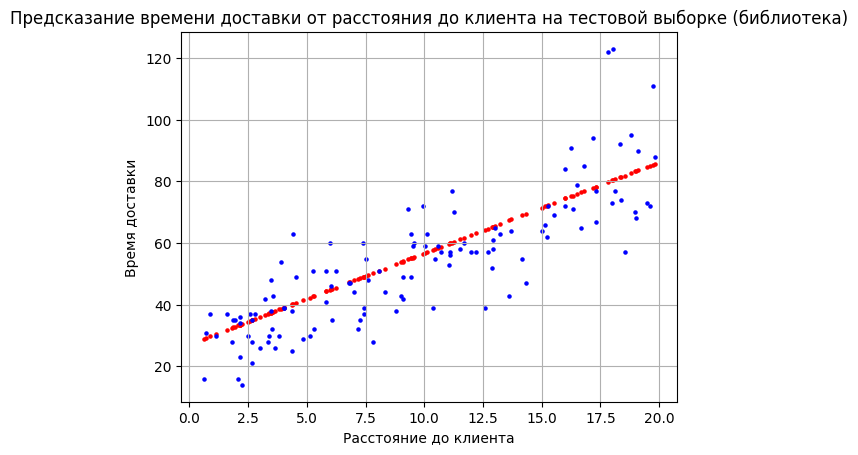

In [54]:
y_pred_lib = ridge.predict(X_test.reshape(-1, 1))

plt.scatter(X_test, y_pred_lib, color='red', s=5)
plt.scatter(X_test, y_test, color='blue', s=5)

plt.title("Предсказание времени доставки от расстояния до клиента на тестовой выборке (библиотека)")
plt.xlabel("Расстояние до клиента")
plt.ylabel("Время доставки")

plt.grid()

plt.show()

In [59]:
quality_lib = np.linalg.norm(y_pred_lib - y_test)
quality_lib

130.26890458403912

In [58]:
betas, b

(2.9546380590369243, 27.17448641973703)

In [57]:
ridge.coef_, ridge.intercept_

(array([2.95463806]), 27.174486419737036)

Полученные коэффициенты и значение функционала качества совпадают

In [64]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_train_centered = X_train_centered.reshape(-1, 1)

In [67]:
%timeit ridge.fit(X_train, y_train)

1.97 ms ± 667 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [63]:
%timeit ridge.predict(X_test)

141 µs ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [68]:
def packed_regression(X):
  U, S, Vt = np.linalg.svd(X, full_matrices=False)
  betas = Vt.T @ np.divide(S, S * S + T, where=(S != 0)) @ U.T @ y_train
  return betas, np.mean(y_train) - betas * np.mean(X_train)

In [69]:
%timeit packed_regression(X_train_centered)

74.5 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [70]:
%timeit betas * X_test + b

4.42 µs ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Библиотечная версия оказалась медленее приведённой выше